Ce code implémente un jeu à deux joueurs basé sur un graphe.  Décomposons son fonctionnement étape par étape :

**1. Initialisation et Configuration du Jeu:**

* **Importation des bibliothèques:** Le code commence par importer les bibliothèques nécessaires : `random` pour la génération aléatoire, `matplotlib.pyplot` pour la visualisation, `networkx` pour la manipulation de graphes, `string` pour manipuler des chaînes de caractères (ici, pour générer des noms de nœuds), et `time` pour la gestion du temps.

* **Paramètres du jeu:** Le programme demande au joueur de saisir le nombre de tours, la mise initiale, et le nom de chaque joueur.

* **Création du graphe:** La fonction `creer_graphe()` crée un objet graphe avec `networkx`.  Initialement, le graphe est composé de nœuds et d'arêtes prédéfinis, qui sont ensuite visualisés à l'aide de `matplotlib.pyplot`.  L'amélioration ultérieure du code introduit la possibilité de définir des longueurs pour chaque arête, modifiant la conception du graphe.

**2. Déroulement d'un Tour:**

* **Choix aléatoire du point de départ et d'arrivée:**  `random.choice(noeuds)` sélectionne aléatoirement un point de départ et d'arrivée sur le graphe. Une vérification assure que le départ et l'arrivée ne sont pas le même nœud.

* **Calcul du chemin optimal:** La fonction `trouver_chemin_optimal()` utilise l'algorithme de Dijkstra (implémenté dans `nx.shortest_path()`) pour trouver le plus court chemin entre le départ et l'arrivée, en tenant compte des poids d'arête si disponibles.

* **Tour du joueur:** La fonction `jouer_tour()` est modifiée à plusieurs reprises dans le code :
    * **Version initiale:** Le programme trouve le chemin optimal et l'affiche. Le joueur ne peut pas interagir.
    * **Version améliorée 1:** Le programme affiche tous les chemins possibles et indique si le joueur a trouvé le chemin optimal, ajoutant une interaction mais n'utilisant pas les longueurs d'arêtes.
    * **Version améliorée 2:** Utilise les poids d'arête dans la recherche du chemin optimal. Le joueur doit désormais saisir un chemin. Le programme compare l'entrée du joueur au chemin optimal et applique les récompenses ou les pénalités en conséquence. Le programme affiche le chemin optimal si le joueur perd.
    * **Version finale:**  Ajoute une limite de temps (60 secondes) pour chaque tour. Si un joueur ne trouve pas le chemin optimal avant la fin du temps imparti, il est pénalisé.

* **Gains et pertes:** Le joueur reçoit un gain positif (+200) si le chemin trouvé est le chemin optimal et une perte (-200) sinon.

**3. Fin du Jeu:**

* **Résultats finaux:** Après tous les tours, le code affiche les gains des deux joueurs pour chaque tour sous forme de graphique. Le joueur ayant le gain moyen le plus élevé remporte la partie.

**Principale amélioration:**

Le code a évolué pour passer d'un simple affichage du chemin optimal à un véritable jeu interactif où les joueurs doivent trouver le chemin optimal, avec un affichage amélioré du graphe (affichage des poids sur les arêtes), un contrôle de l'entrée utilisateur et une logique de gain/perte plus claire.


**En résumé:**  Ce code simule un jeu de recherche de chemin optimal sur un graphe.  Le jeu a été progressivement amélioré pour incorporer une interaction utilisateur, une gestion du temps et un mécanisme plus complet de gains et pertes.


## Code principal

Nombre de tours à jouer : 2
Mise initiale par joueur : 400
Joueur 1, entrez votre nom : rene
Joueur 2, entrez votre nom : isaac


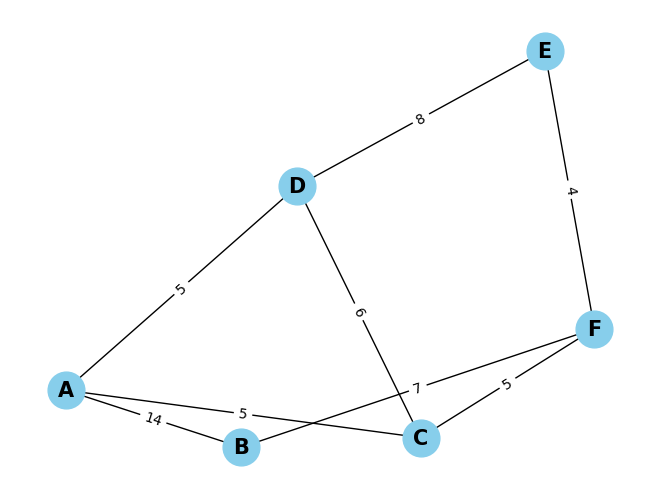


--- Tour 1 ---
Point de départ : B, Point d'arrivée : E

Tour de rene:
Entrez votre chemin (ex: A B C D) de B à E : B F E
Chemin trouvé : ['B', 'F', 'E'] - Gagné ! +200 (Longueur du chemin : 2)

Tour de isaac:
Entrez votre chemin (ex: A B C D) de B à E : B F E
Chemin trouvé : ['B', 'F', 'E'] - Gagné ! +200 (Longueur du chemin : 2)
Match nul pour ce tour

--- Tour 2 ---
Point de départ : D, Point d'arrivée : B

Tour de rene:
Entrez votre chemin (ex: A B C D) de D à B : D B
Mauvais chemin. Le chemin optimal était ['D', 'C', 'F', 'B'] (Longueur : 3). Perdu! -200

Tour de isaac:
Entrez votre chemin (ex: A B C D) de D à B : R V
Le chemin doit commencer par D et finir par B
Temps écoulé. Le tour passe au joueur suivant.
Match nul pour ce tour

--- Résultats finaux ---


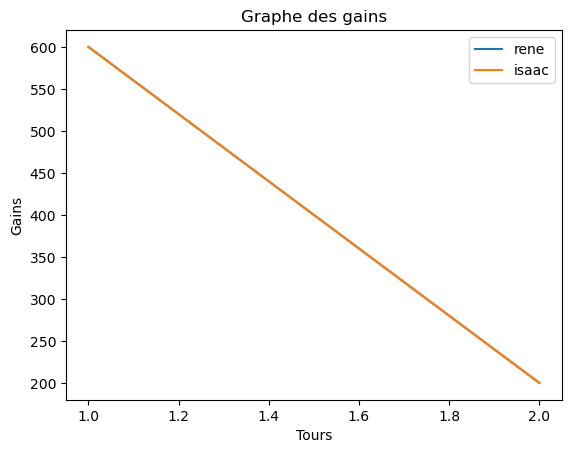

Gain moyen de rene : 400.0
Gain moyen de isaac : 400.0
Match nul !


In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import string
import time

def creer_graphe(noeuds, connexions, avec_longueurs=False):
    """Crée un graphe et le visualise."""
    graphe = nx.Graph()
    graphe.add_nodes_from(noeuds)

    if avec_longueurs:
        for u, v, longueur in connexions:
            graphe.add_edge(u, v, weight=longueur)
    else:
        graphe.add_edges_from(connexions)
    
    pos = nx.spring_layout(graphe)  # Positionnement des nœuds
    labels = nx.get_edge_attributes(graphe, 'weight')
    nx.draw(graphe, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=15, font_weight="bold")
    nx.draw_networkx_edge_labels(graphe, pos, edge_labels=labels)
    plt.show()
    return graphe

def jouer_tour(graphe, joueur_nom, depart, arrivee, mise):
    print(f"\nTour de {joueur_nom}:")
    chemin_optimal = nx.shortest_path(graphe, source=depart, target=arrivee, weight='weight')
    longueur_chemin_optimal = len(chemin_optimal) - 1
    
    start_time = time.time()
    while True:
        elapsed_time = time.time() - start_time
        if elapsed_time > 60:
            print("Temps écoulé. Le tour passe au joueur suivant.")
            return mise - 200 # Pénalité pour ne pas avoir joué à temps

        try:
            chemin_joueur = input(f"Entrez votre chemin (ex: A B C D) de {depart} à {arrivee} : ").split()
            if chemin_joueur[0] != depart or chemin_joueur[-1] != arrivee:
                print("Le chemin doit commencer par", depart, "et finir par", arrivee)
                continue
            if chemin_joueur == chemin_optimal:
                gain = mise + 200
                print(f"Chemin trouvé : {chemin_joueur} - Gagné ! +200 (Longueur du chemin : {longueur_chemin_optimal})")
                return gain
            else:
                gain = mise - 200
                print(f"Mauvais chemin. Le chemin optimal était {chemin_optimal} (Longueur : {longueur_chemin_optimal}). Perdu! -200")
                return gain
        except (IndexError, ValueError):
            print("Entrée invalide. Veuillez entrer un chemin valide.")
            
def main():
    # Initialisation du jeu
    nb_tours = int(input("Nombre de tours à jouer : "))
    mise_initiale = int(input("Mise initiale par joueur : "))

    joueur1_nom = input("Joueur 1, entrez votre nom : ")
    joueur2_nom = input("Joueur 2, entrez votre nom : ")

    # Utilisation d'un graphe plus petit pour meilleure visibilité
    noeuds = ['A', 'B', 'C', 'D', 'E']
    connexions = [('A', 'B', 14), ('A', 'D', 5), ('D', 'E', 8), ('E', 'F', 4), ('F','C',5),('A','C',5),('B','F',7),('D','C',6),]
    graphe_jeu = creer_graphe(noeuds, connexions, avec_longueurs=True)

    gains_j1 = []
    gains_j2 = []

    for tour in range(nb_tours):
        print(f"\n--- Tour {tour + 1} ---")
        depart = random.choice(noeuds)
        arrivee = random.choice(noeuds)
        while depart == arrivee:
            arrivee = random.choice(noeuds)
        print(f"Point de départ : {depart}, Point d'arrivée : {arrivee}")

        gain_j1 = jouer_tour(graphe_jeu, joueur1_nom, depart, arrivee, mise_initiale)
        gain_j2 = jouer_tour(graphe_jeu, joueur2_nom, depart, arrivee, mise_initiale)

        gains_j1.append(gain_j1)
        gains_j2.append(gain_j2)

        if gain_j1 > gain_j2:
            print(f"{joueur1_nom} a gagné ce tour")
        elif gain_j2 > gain_j1:
            print(f"{joueur2_nom} a gagné ce tour")
        else:
            print("Match nul pour ce tour")

    # Affichage des résultats finaux
    print("\n--- Résultats finaux ---")
    plt.plot(range(1, nb_tours + 1), gains_j1, label=joueur1_nom)
    plt.plot(range(1, nb_tours + 1), gains_j2, label=joueur2_nom)
    plt.xlabel("Tours")
    plt.ylabel("Gains")
    plt.title("Graphe des gains")
    plt.legend()
    plt.show()
    
    gain_moyen_j1 = sum(gains_j1) / nb_tours
    gain_moyen_j2 = sum(gains_j2) / nb_tours
    print(f"Gain moyen de {joueur1_nom} : {gain_moyen_j1}")
    print(f"Gain moyen de {joueur2_nom} : {gain_moyen_j2}")

    if gain_moyen_j1 > gain_moyen_j2:
        print(f"{joueur1_nom} est le gagnant final !")
    elif gain_moyen_j2 > gain_moyen_j1:
        print(f"{joueur2_nom} est le gagnant final !")
    else:
        print("Match nul !")

if __name__ == "__main__":
    main()
